## Prediction of Titanic Survivals

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline     # this is used to ensure same scaling is applied during training and testing
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.preprocessing import StandardScaler


In [3]:
# Load the dataset
titanic = pd.read_csv("C:/Users/akinw/Downloads/titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Exploratory Data Analysis

In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
#check for missing values
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Visual EDA

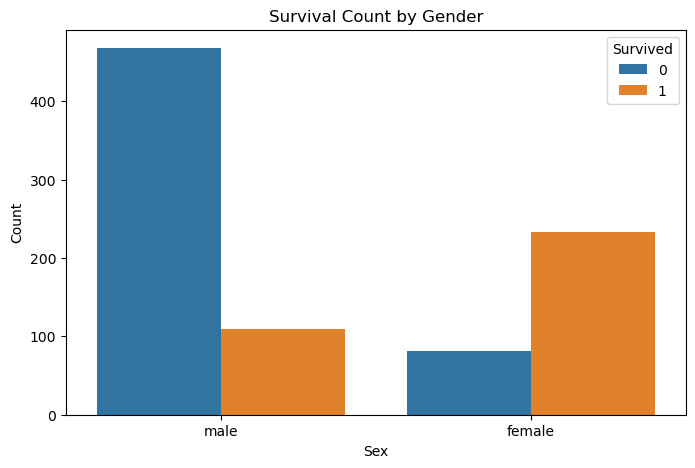

In [9]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Sex', hue='Survived', data=titanic)
plt.title('Survival Count by Gender')
plt.ylabel('Count')
plt.show()


## Data Cleaning

In [11]:
#flll the missing values and drop the unnecessary columns
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)
titanic.drop(columns=['Cabin'], inplace=True)  #due to too many values

C:\Users\akinw\AppData\Local\Temp\ipykernel_27552\1882440997.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Age'].fillna(titanic['Age'].median(), inplace=True)
C:\Users\akinw\AppData\Local\Temp\ipykernel_27552\1882440997.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

In [12]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [13]:
#confirming the null values again

In [14]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [15]:
# convert categorical to numeric
titanic['Sex'] = titanic['Sex'].map({'male':0, 'female':1})
titanic = pd.get_dummies(titanic, columns=['Embarked'], drop_first=True)

In [16]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,False,False
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,False,True
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,False,True


In [17]:
titanic['Age'] = titanic['Age'].astype(int)  #as Age cannot be in float

In [18]:
# Convert the 'Age' column to numeric, coercing errors to NaN (to handle any non-numeric values)
titanic['Age'] = pd.to_numeric(titanic['Age'], errors='coerce')

# Check for the minimum and maximum age values
min_age = titanic['Age'].min()
max_age = titanic['Age'].max()

# Display the correct least and maximum values
print(f"Least Age: {min_age}")
print(f"Maximum Age: {max_age}")

# If you want to check how many missing values (NaN) are present:
print(f"Missing Age Values (NaN): {titanic['Age'].isna().sum()}")


Least Age: 0
Maximum Age: 80
Missing Age Values (NaN): 0


In [19]:
#check for duplicate
duplicates = titanic[titanic.duplicated()]
duplicates

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S


## Feature Engineering

In [21]:
#Create new features having addition of SibSp(Sibling and Spouse) and Parent/Children(Parch)
titanic['familysize'] = titanic['SibSp'] + titanic['Parch'] + 1

In [22]:
#remove title from Names
titanic['Title'] = titanic['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
titanic['Title'] = titanic['Title'].replace(['Mlle', 'Ms', 'Mme'], 'Miss')
titanic['Title'] = titanic['Title'].replace(['Lady', 'Countess', 'Dona'], 'Royalty')
titanic['Title'] = titanic['Title'].replace(['Dr', 'Rev', 'Col', 'Major', 'Capt', 'Sir', 'Don', 'Jonkheer'], 'Rare')
titanic = pd.get_dummies(titanic, columns = ['Title'], drop_first=True)
titanic.drop(columns=['Name', 'Ticket'], inplace = True)  #drop unnecessay columns

<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\.'
C:\Users\akinw\AppData\Local\Temp\ipykernel_27552\3449391557.py:2: SyntaxWarning: invalid escape sequence '\.'
  titanic['Title'] = titanic['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


In [23]:
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,familysize,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Title_Royalty
0,1,0,3,0,22,1,0,7.2500,False,True,2,False,True,False,False,False
1,2,1,1,1,38,1,0,71.2833,False,False,2,False,False,True,False,False
2,3,1,3,1,26,0,0,7.9250,False,True,1,True,False,False,False,False
3,4,1,1,1,35,1,0,53.1000,False,True,2,False,False,True,False,False
4,5,0,3,0,35,0,0,8.0500,False,True,1,False,True,False,False,False


## Model training with different MLs for comparison

In [25]:
# RandomForest Classifier
from sklearn.datasets import load_iris
X = titanic.drop(columns = ['PassengerId', 'Survived'])
y = titanic['Survived']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Random Forest model
rf = RandomForestClassifier(random_state=42)

# Hyperparameter grid to knoe the best parameter
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=1, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
y_pred_rf = best_rf.predict(X_test)

print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(f"Precision: {precision_score(y_test, y_pred_rf):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_rf):.4f}")

# Optional: Full classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'bootstrap': True, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}
Accuracy: 0.8268156424581006
Precision: 0.8116
Recall: 0.7568
F1 Score: 0.7832

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86       105
           1       0.81      0.76      0.78        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



In [26]:
# Logistic Regression with Hyperparameter Tuning
log_reg = LogisticRegression(max_iter=1000)

# Hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],               # Inverse of regularization strength
    'penalty': ['l1', 'l2'],                   # Regularization types
    'solver': ['liblinear', 'saga']            # Solvers that support both l1 and l2
}

# Grid search
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=1, scoring='accuracy')
grid_search.fit(X_train, y_train)

#Best model
best_log_reg = grid_search.best_estimator_
y_pred_lr = best_log_reg.predict(X_test)

print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(f"Precision: {precision_score(y_test, y_pred_lr):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_lr):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_lr):.4f}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy: 0.8100558659217877
Precision: 0.7778
Recall: 0.7568
F1 Score: 0.7671


In [27]:
# K Nearest Neighbour (KNN) with hyperparameter tuning
# KNN works better with scaled data, so we use a pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

# Hyperparameter grid for KNN
param_grid = {
    'knn__n_neighbors': [3, 5, 7, 9, 11],
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan']
}

# Grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=1, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best model
best_knn = grid_search.best_estimator_
y_pred_knn = best_knn.predict(X_test)

print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print(f"Precision: {precision_score(y_test, y_pred_knn):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_knn):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_knn):.4f}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'knn__metric': 'manhattan', 'knn__n_neighbors': 11, 'knn__weights': 'uniform'}
Accuracy: 0.8212290502793296
Precision: 0.8182
Recall: 0.7297
F1 Score: 0.7714


In [28]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [29]:
# XG Boost Classifier with hyperparameter tuning
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Grid search
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=1, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_xgb = grid_search.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)

print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(f"Precision: {precision_score(y_test, y_pred_xgb):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_xgb):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_xgb):.4f}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits


C:\Users\akinw\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:45:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1.0}
Accuracy: 0.8324022346368715
Precision: 0.8235
Recall: 0.7568
F1 Score: 0.7887


In [30]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [31]:
# Light Gradient Boost Classifier with hyperparameter tuning
lgbm = LGBMClassifier(random_state=42)

# Hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [-1, 3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [15, 31, 63],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Grid search
grid_search = GridSearchCV(estimator=lgbm, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=1, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best model
best_lgbm = grid_search.best_estimator_
y_pred_lgbm = best_lgbm.predict(X_test)

# Results
print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_lgbm))
print(f"Precision: {precision_score(y_test, y_pred_lgbm):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_lgbm):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_lgbm):.4f}")

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000338 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 210
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

## compare the models

In [33]:
model_scores = {
    "Random Forest": accuracy_score(y_test, y_pred_rf),
    "Logistic Regression": accuracy_score(y_test, y_pred_lr),
    "KNN": accuracy_score(y_test, y_pred_knn),
      "XGBoost": accuracy_score(y_test, y_pred_xgb),
    "LightGBM": accuracy_score(y_test, y_pred_lgbm)
}

# Print sorted scores
for model, score in sorted(model_scores.items(), key=lambda x: x[1], reverse=True):
    print(f"{model}: {score:.4f}")


LightGBM: 0.8436
XGBoost: 0.8324
Random Forest: 0.8268
KNN: 0.8212
Logistic Regression: 0.8101


C:\Users\akinw\AppData\Local\Temp\ipykernel_27552\3835933537.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=df_scores, x='Model', y='Accuracy', palette='Blues_d')


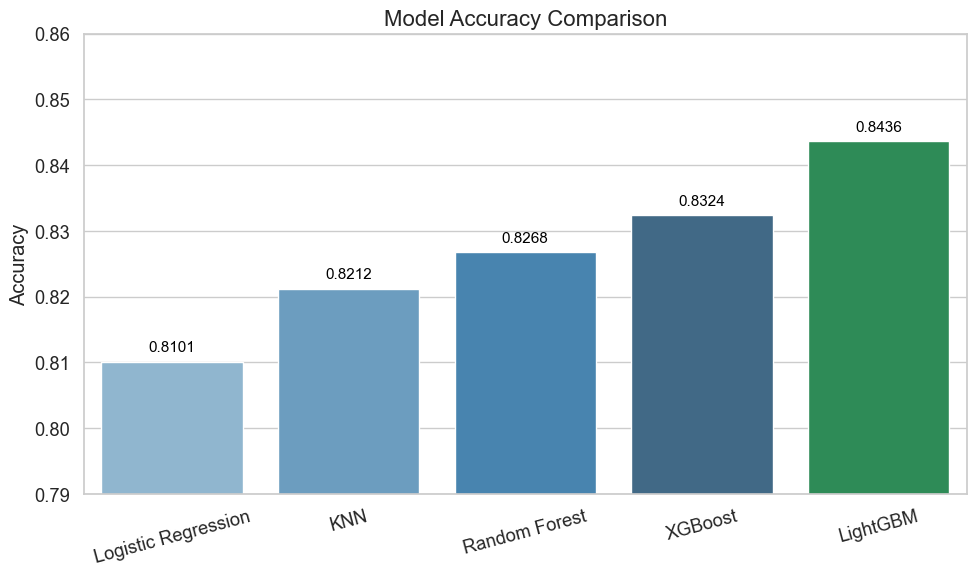

In [34]:
## visualising the models
# Model names and their accuracies
model_scores = {
    'Model': ['Logistic Regression', 'KNN', 'Random Forest', 'XGBoost', 'LightGBM'],
    'Accuracy': [0.8101, 0.8212, 0.8268, 0.8324, 0.8436]
}

# Convert to DataFrame
df_scores = pd.DataFrame(model_scores)

# Set style
sns.set(style="whitegrid", font_scale=1.2)

# Create barplot
plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=df_scores, x='Model', y='Accuracy', palette='Blues_d')

# Highlight the best model
best_model = df_scores.loc[df_scores['Accuracy'].idxmax()]
barplot.patches[df_scores['Accuracy'].idxmax()].set_facecolor('seagreen')

# Add accuracy labels
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.4f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='bottom',
                     fontsize=11, color='black',
                     xytext=(0, 5),
                     textcoords='offset points')

# Final plot adjustments
plt.title('Model Accuracy Comparison', fontsize=16)
plt.ylim(0.79, 0.86)
plt.ylabel('Accuracy')
plt.xlabel('')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


In [35]:
## Plot Actual Value vs Predicted Value, also the residuals

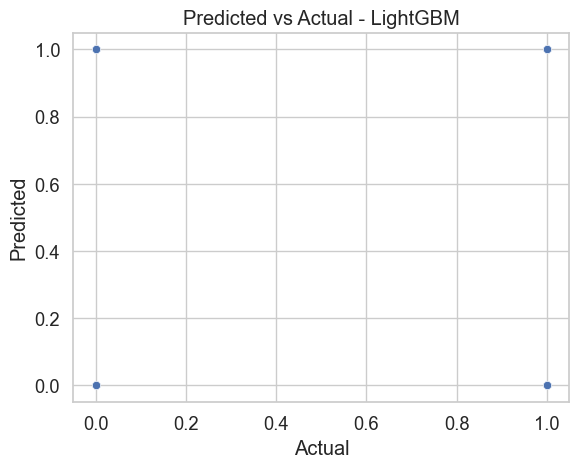

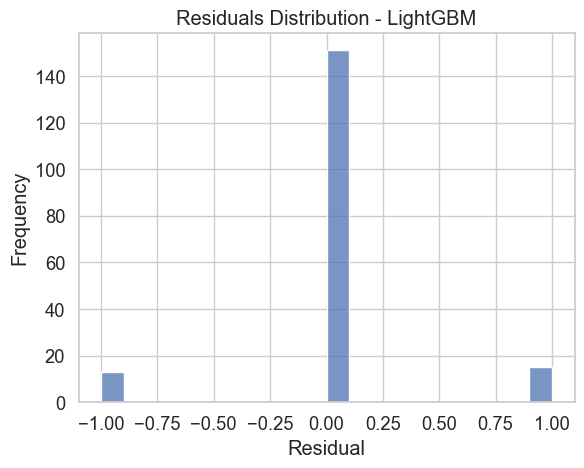

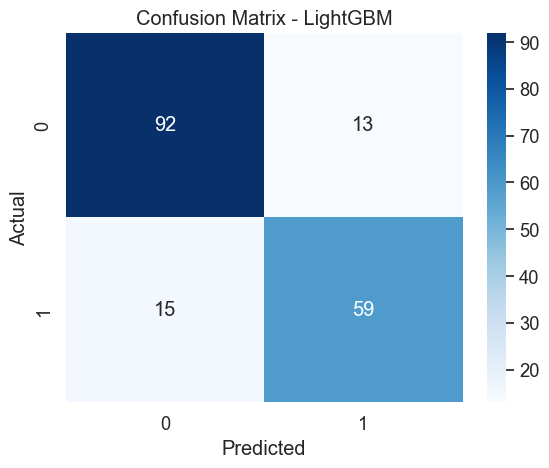

In [36]:
# Plot predicted vs actual
sns.scatterplot(x=y_test, y=y_pred_lgbm)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Predicted vs Actual - LightGBM")
plt.grid(True)
plt.show()

# Plot residuals
residuals = y_test - y_pred_lgbm
sns.histplot(residuals, bins=20)
plt.title("Residuals Distribution - LightGBM")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_lgbm)
sns.heatmap(cm, annot=True, cmap="Blues", fmt='d')
plt.title("Confusion Matrix - LightGBM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


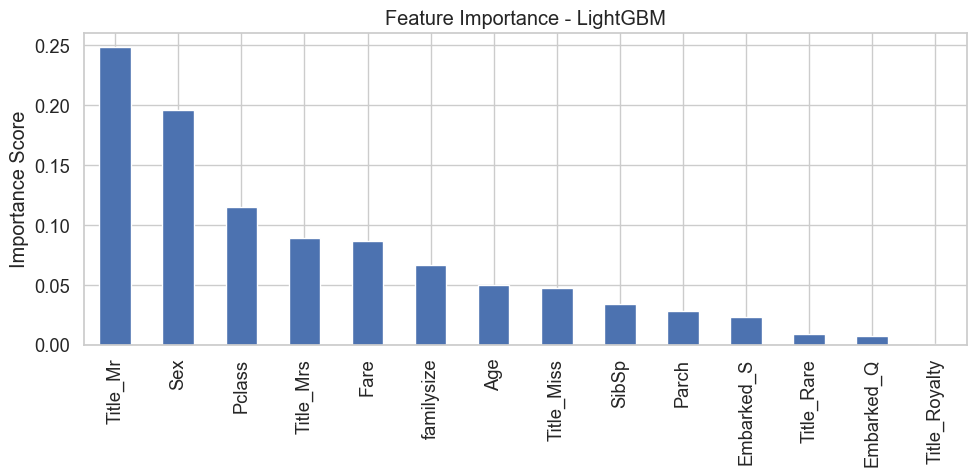

In [37]:
import pandas as pd

feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(10, 5))
plt.title("Feature Importance - LightGBM")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()
